In [1]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sn
import io

In [148]:
df_scale = pd.read_csv('data/대구전처리6차.csv') #표준화한 df
df = df_scale.set_index('행정동')
df

,구,장애수,교통안전지수,14~23세수,콜택시,대중교통 만족도,예산액,복지 만족도,의류소비인구
행정동,,,,,,,,,
대명10동,남구,-0.563972,1.828833,-1.213666,0.279217,0.084350,-0.287678,-0.854031,-0.615325
대명11동,남구,-0.376941,1.828833,-0.831160,0.412200,0.084350,-0.372846,-0.854031,-0.431304
대명1동,남구,-0.485680,1.828833,-0.831160,-0.533088,0.084350,0.116441,-0.854031,-0.543762
대명2동,남구,-0.503078,1.828833,-0.831160,0.062977,0.084350,-0.087494,-0.854031,-0.553985
대명3동,남구,-0.207308,1.828833,-0.831160,5.139026,0.084350,0.012208,-0.854031,-0.257507
...,...,...,...,...,...,...,...,...,...
동인동,중구,-0.707508,1.159254,-0.066148,0.360435,-0.595563,-0.495207,1.291234,-0.717559
삼덕동,중구,-1.381690,1.159254,-1.213666,1.622818,-0.595563,-0.741335,1.291234,-1.412750
성내1동,중구,-1.381690,1.159254,-1.213666,1.452732,-0.595563,-1.036064,1.291234,-1.412750


부문별 데이터프레임생성

In [149]:
#교통 데이터 프레임
df_traffic=pd.DataFrame(df[['장애수','교통안전지수','콜택시','대중교통 만족도']])

#의류
df_clothes=pd.DataFrame(df[['장애수','14~23세수','의류소비인구']])

#편의
df_welfare=pd.DataFrame(df[['장애수','예산액','복지 만족도']])

df_traffic

,장애수,교통안전지수,콜택시,대중교통 만족도
행정동,,,,
대명10동,-0.563972,1.828833,0.279217,0.084350
대명11동,-0.376941,1.828833,0.412200,0.084350
대명1동,-0.485680,1.828833,-0.533088,0.084350
대명2동,-0.503078,1.828833,0.062977,0.084350
대명3동,-0.207308,1.828833,5.139026,0.084350
...,...,...,...,...
동인동,-0.707508,1.159254,0.360435,-0.595563
삼덕동,-1.381690,1.159254,1.622818,-0.595563
성내1동,-1.381690,1.159254,1.452732,-0.595563


### Boxplot - 변수 분포 확인

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


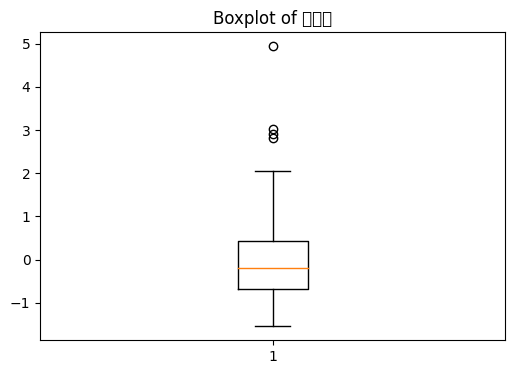

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\

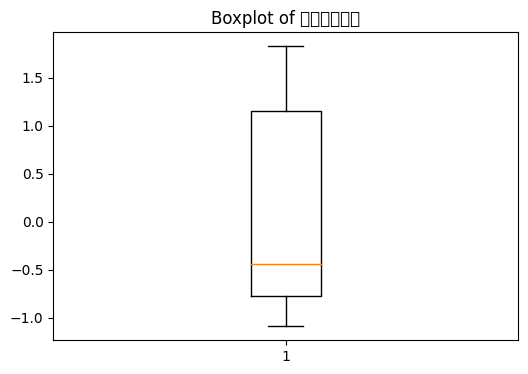

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


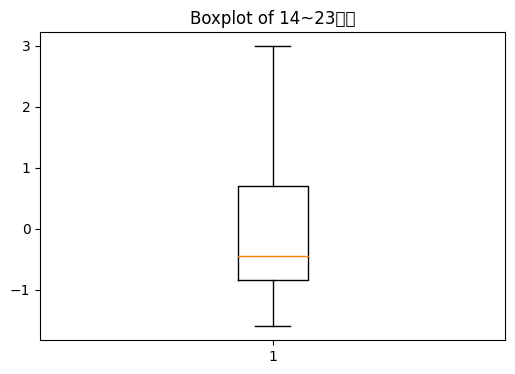

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


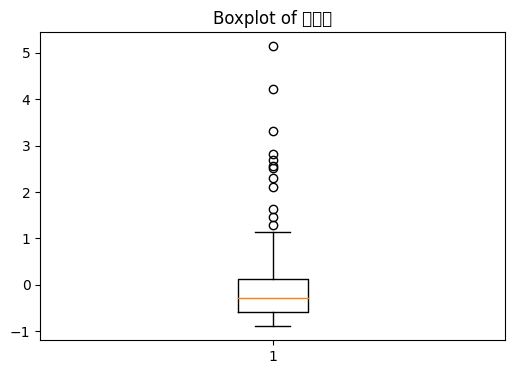

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda

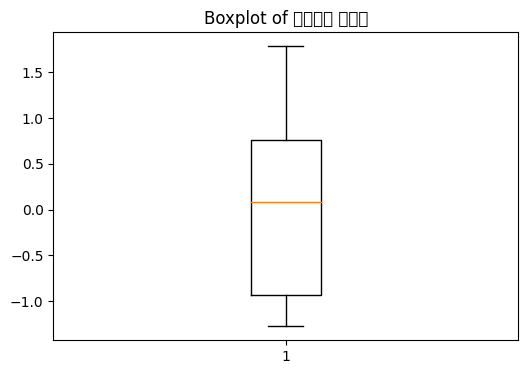

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


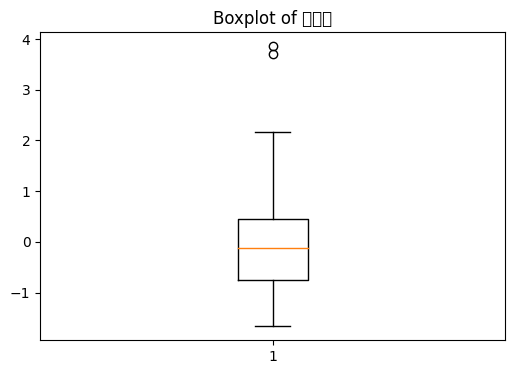

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


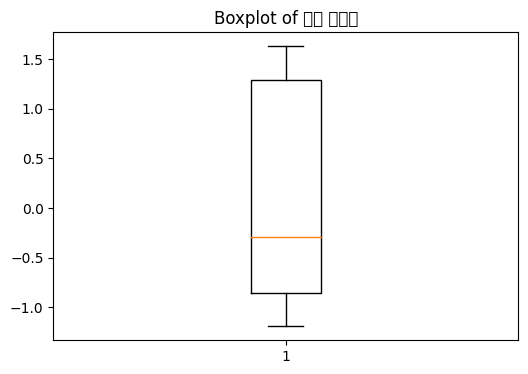

C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\000hj\anaconda3\lib\

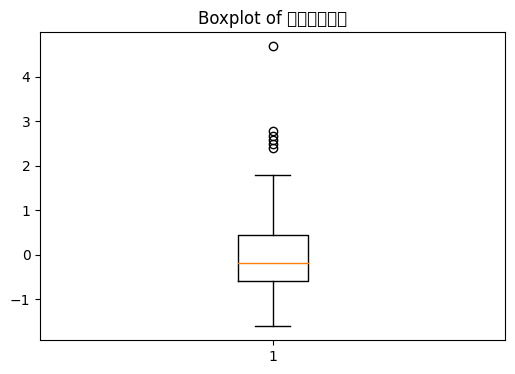

In [185]:
selected_columns = ['장애수', '교통안전지수', '14~23세수', '콜택시', '대중교통 만족도', '예산액', '복지 만족도', '의류소비인구']

# 각 변수에 대한 별도의 boxplot 생성
for column in selected_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### 군집개수선정 - 실루엣계수 : kmeans예시

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

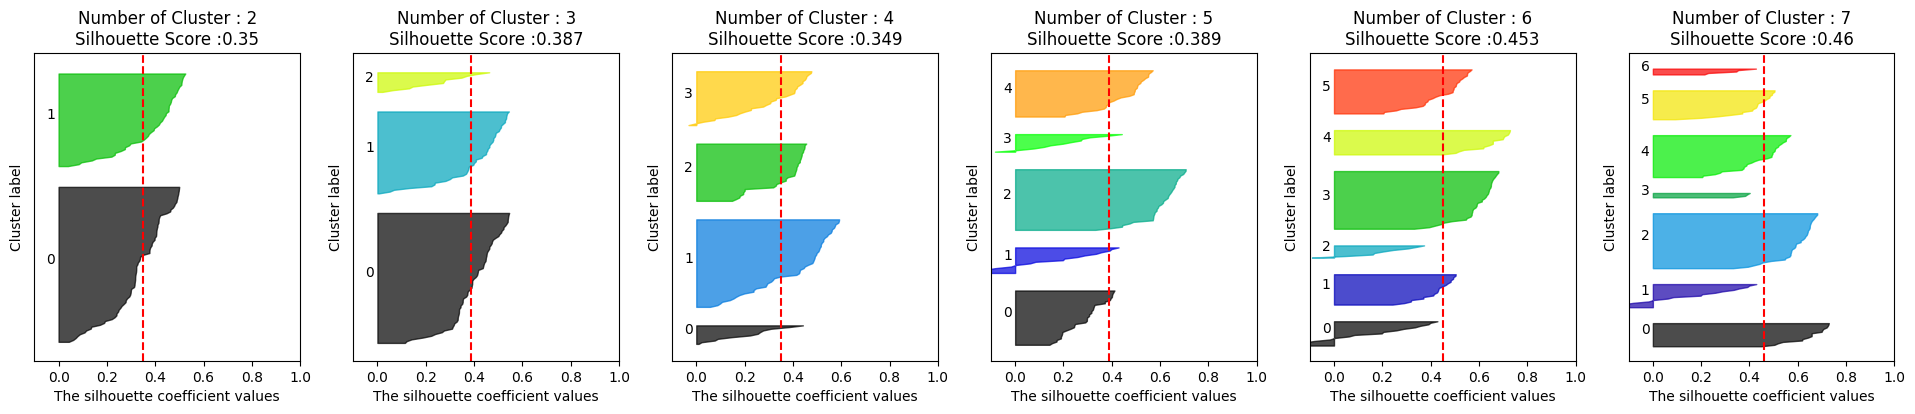

In [188]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters=n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        
visualize_silhouette([ 2, 3, 4,5,6,7 ], df_traffic)

### 군집 개수 선정 - 엘보우 차트 : kmeans *별로인듯

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

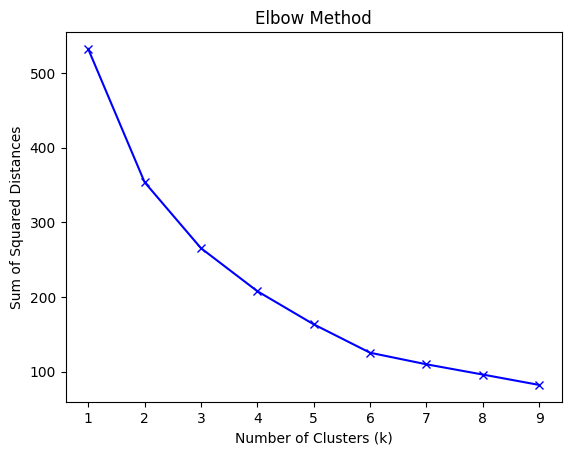

In [189]:
inertias = []
k_values = range(1, 10)  # try different values of k

for k in k_values:
    kmedoids = KMeans(n_clusters=k, random_state=0)
    kmedoids.fit(df_traffic)
    inertias.append(kmedoids.inertia_)
    
# Plot the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

### 군집화 - 가우시안

In [150]:
#교통
gm_traffic= GaussianMixture(n_components=3, random_state=10).fit(df_traffic)
gm_traffic_cluster_labels=gm_traffic.predict(df_traffic)
df_traffic['군집']=gm_traffic_cluster_labels

gm_taffic_mean=df_traffic.groupby(['군집'],as_index=True).mean()
gm_taffic_mean
#1

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,교통안전지수,콜택시,대중교통 만족도
군집,,,,
0,-0.572982,1.400092,0.199839,0.578097
1,-0.035645,-0.352101,-0.314793,0.590508
2,0.558027,-0.933898,0.125488,-1.105498


In [151]:
#교통 - 행정동
gm_traffic_selected=df_traffic[df_traffic['군집']==0]
df_traffic.drop(columns='군집', inplace=True) #컬럼삭제
dong_gm_traffic=gm_traffic_selected.index
dong_gm_traffic

Index(['대명10동', '대명11동', '대명1동', '대명2동', '대명3동', '대명4동', '대명5동', '대명6동',
       '대명9동', '봉덕1동', '봉덕2동', '봉덕3동', '이천동', '내당1동', '내당2,3동', '내당4동', '비산1동',
       '비산2,3동', '비산4동', '비산5동', '비산6동', '비산7동', '평리1동', '평리2동', '평리3동',
       '평리4동', '평리5동', '평리6동', '상중이동', '원대동', '남산1동', '남산2동', '남산3동', '남산4동',
       '대봉1동', '대봉2동', '대신동', '동인동', '삼덕동', '성내1동', '성내2동', '성내3동'],
      dtype='object', name='행정동')

In [152]:
#의류
gm_clothes= GaussianMixture(n_components=3, random_state=0).fit(df_clothes)
gm_clothes_cluster_labels=gm_clothes.predict(df_clothes)
df_clothes['군집']=gm_clothes_cluster_labels

gm_clothes_mean=df_clothes.groupby(['군집'],as_index=True).mean()
gm_clothes_mean #군집 1번 선택

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,14~23세수,의류소비인구
군집,,,
0,0.161948,0.819656,0.419659
1,2.709802,2.292641,2.935601
2,-0.251829,-0.504526,-0.377086


In [153]:
# 의류 - 행정동
gm_clothes_selected=df_clothes[df_clothes['군집']==1]
df_clothes.drop(columns='군집', inplace=True)
dong_clothes=gm_clothes_selected.index
dong_clothes

Index(['신당동', '월성2동', '진천동', '안심1동', '지산1동', '범물1동'], dtype='object', name='행정동')

In [154]:
#편의
gm_welfare= GaussianMixture(n_components=3, random_state=0).fit(df_welfare)
gm_welfare_cluster_labels=gm_welfare.predict(df_welfare)
df_welfare['군집']=gm_welfare_cluster_labels

gm_welfare_mean=df_welfare.groupby(['군집'],as_index=True).mean()
gm_welfare_mean

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,예산액,복지 만족도
군집,,,
0,1.454227,1.262431,-0.127488
1,-0.498356,-0.369363,1.513825
2,-0.213397,-0.214776,-0.667355


In [156]:
gm_welfare_selected=df_welfare[df_welfare['군집']==0]
df_welfare.drop(columns='군집', inplace=True) #컬럼삭제
dong_gm_welfare=gm_welfare_selected.index
dong_gm_welfare

Index(['성당동', '본리동', '감삼동', '용산1동', '용산2동', '이곡1동', '신당동', '월성1동', '월성2동',
       '진천동', '유천동', '상인1동', '상인3동', '도원동', '송현1동', '송현2동', '안심1동', '공산동',
       '관문동', '구암동', '무태조야동', '산격1동', '태전2동'],
      dtype='object', name='행정동')

### 군집화 - kmeans

In [157]:
#교통
kmeans_traffic= KMeans(n_clusters=3, random_state=32).fit(df_traffic)
kmeans_traffic_cluster_labels=kmeans_traffic.predict(df_traffic)
df_traffic['군집']=kmeans_traffic_cluster_labels

kmeans_taffic_mean=df_traffic.groupby(['군집'],as_index=True).mean()
kmeans_taffic_mean

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,교통안전지수,콜택시,대중교통 만족도
군집,,,,
0,-0.254848,0.124764,-0.421769,0.949152
1,0.677252,-0.899940,0.104370,-1.004899
2,-0.691076,1.369835,0.700989,-0.180061


In [159]:
#교통 - 행정동
kmeans_traffic_selected=df_traffic[df_traffic['군집']==2]
df_traffic.drop(columns='군집', inplace=True) #컬럼삭제
dong_kmeans_traffic=kmeans_traffic_selected.index
dong_kmeans_traffic

Index(['대명10동', '대명11동', '대명1동', '대명2동', '대명3동', '대명4동', '대명5동', '대명6동',
       '대명9동', '봉덕1동', '봉덕2동', '봉덕3동', '이천동', '신암4동', '파동', '남산1동', '남산2동',
       '남산3동', '남산4동', '대봉1동', '대봉2동', '대신동', '동인동', '삼덕동', '성내1동', '성내2동',
       '성내3동'],
      dtype='object', name='행정동')

In [160]:
#의류
kmeans_clothes= KMeans(n_clusters=3, random_state=0).fit(df_clothes)
kmeans_clothes_cluster_labels=kmeans_clothes.predict(df_clothes)
df_clothes['군집']=kmeans_clothes_cluster_labels

kmeans_clothes_mean=df_clothes.groupby(['군집'],as_index=True).mean()
kmeans_clothes_mean #군집 

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,14~23세수,의류소비인구
군집,,,
0,-0.566173,-0.623777,-0.588720
1,0.634748,0.771723,0.664790
2,2.541618,2.420143,2.617823


In [162]:
#의류 - 행정동
kmeans_clothes_selected=df_clothes[df_clothes['군집']==2]
df_clothes.drop(columns='군집', inplace=True)
dong_kmeans_clothes=kmeans_clothes_selected.index
dong_kmeans_clothes

Index(['신당동', '월성2동', '진천동', '안심1동', '관문동', '무태조야동', '지산1동', '범물1동'], dtype='object', name='행정동')

In [166]:
#편의
kmeans_welfare= KMeans(n_clusters=3, random_state=0).fit(df_welfare)
kmeans_welfare_cluster_labels=kmeans_welfare.predict(df_welfare)
df_welfare['군집']=kmeans_welfare_cluster_labels

kmeans_welfare_mean=df_welfare.groupby(['군집'],as_index=True).mean()
kmeans_welfare_mean

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,예산액,복지 만족도
군집,,,
0,1.126076,1.216162,-0.323988
1,-0.356159,-0.468105,-0.630006
2,-0.532374,-0.420330,1.510409


In [167]:
#편의 - 행정동
kmeans_welfare_selected=df_welfare[df_welfare['군집']==0]
df_welfare.drop(columns='군집', inplace=True) #컬럼삭제
dong_kmeans_welfare=kmeans_welfare_selected.index
dong_kmeans_welfare

Index(['대명9동', '봉덕3동', '성당동', '감삼동', '용산1동', '용산2동', '이곡1동', '신당동', '월성1동',
       '월성2동', '진천동', '유천동', '상인1동', '상인3동', '도원동', '송현1동', '송현2동', '불로,봉무동',
       '방촌동', '안심1동', '안심3동', '안심4동', '공산동', '관문동', '구암동', '국우동', '동천동',
       '무태조야동', '복현2동', '읍내동', '칠성동', '태전1동', '태전2동', '평리4동', '상중이동', '고산3동'],
      dtype='object', name='행정동')

### 군집화 - kmedoids

In [168]:
#교통
kmedoids_traffic = KMedoids(n_clusters=3, random_state=0)
kmedoids_traffic_cluster_labels = kmedoids_traffic.fit_predict(df_traffic)
df_traffic['군집']=kmedoids_traffic_cluster_labels
#kmedoids_traffic.cluster_centers_ #중심점

kmedoids_taffic_mean=df_traffic.groupby(['군집'],as_index=True).mean()
kmedoids_taffic_mean

,장애수,교통안전지수,콜택시,대중교통 만족도
군집,,,,
0,0.689649,-0.922701,0.133750,-1.061156
1,-0.812441,0.502193,0.336166,0.109847
2,0.016464,0.475671,-0.417003,0.945092


In [170]:
#교통 - 행정동
kmedoids_traffic_selected=df_traffic[df_traffic['군집']==1]
df_traffic.drop(columns='군집', inplace=True) #컬럼삭제
dong_kmedoids_traffic=kmedoids_traffic_selected.index
dong_kmedoids_traffic

Index(['대명10동', '대명11동', '대명2동', '대명3동', '대명4동', '대명5동', '봉덕1동', '신암1동',
       '신암3동', '신암4동', '신암5동', '신천3동', '신천4동', '도평동', '고성동', '평리5동', '범어1동',
       '범어2동', '범어3동', '범어4동', '만촌2동', '만촌3동', '수성2,3가동', '황금2동', '중동', '파동',
       '두산동', '범물2동', '남산1동', '남산2동', '남산3동', '남산4동', '대봉1동', '대봉2동', '대신동',
       '동인동', '삼덕동', '성내1동', '성내2동', '성내3동'],
      dtype='object', name='행정동')

In [171]:
#의류
kmedoids_clothes= KMedoids(n_clusters=3, random_state=0).fit(df_clothes)
kmedoids_clothes_cluster_labels=kmedoids_clothes.predict(df_clothes)
df_clothes['군집']=kmedoids_clothes_cluster_labels

kmedoids_clothes_mean=df_clothes.groupby(['군집'],as_index=True).mean()
kmedoids_clothes_mean #군집 

,장애수,14~23세수,의류소비인구
군집,,,
0,-0.141365,-0.298384,-0.153630
1,1.147353,1.322954,1.202018
2,-0.914948,-0.860584,-0.950600


In [172]:
#의류 - 행정동
kmedoids_clothes_selected=df_clothes[df_clothes['군집']==1]
df_clothes.drop(columns='군집', inplace=True)#컬럼삭제
dong_kmedoids_clothes=kmedoids_clothes_selected.index
dong_kmedoids_clothes

Index(['성당동', '감삼동', '용산1동', '용산2동', '신당동', '월성2동', '진천동', '상인3동', '도원동',
       '송현1동', '송현2동', '안심1동', '안심4동', '공산동', '관문동', '관음동', '구암동', '국우동',
       '대현동', '동천동', '무태조야동', '복현2동', '산격1동', '읍내동', '칠성동', '침산3동', '태전1동',
       '태전2동', '만촌1동', '수성1가동', '황금1동', '상동', '지산1동', '지산2동', '범물1동', '고산1동',
       '고산2동', '고산3동'],
      dtype='object', name='행정동')

In [173]:
#편의
kmedoids_welfare= KMeans(n_clusters=3, random_state=0).fit(df_welfare)
kmedoids_welfare_cluster_labels=kmedoids_welfare.predict(df_welfare)
df_welfare['군집']=kmedoids_welfare_cluster_labels

kmedoids_welfare_mean=df_welfare.groupby(['군집'],as_index=True).mean()
kmedoids_welfare_mean

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,장애수,예산액,복지 만족도
군집,,,
0,1.126076,1.216162,-0.323988
1,-0.356159,-0.468105,-0.630006
2,-0.532374,-0.420330,1.510409


In [175]:
#편의 -행정동
kmedoids_welfare_selected=df_welfare[df_welfare['군집']==0]
df_welfare.drop(columns='군집', inplace=True) #컬럼삭제
dong_kmedoids_welfare=kmedoids_welfare_selected.index
dong_kmedoids_welfare

Index(['대명9동', '봉덕3동', '성당동', '감삼동', '용산1동', '용산2동', '이곡1동', '신당동', '월성1동',
       '월성2동', '진천동', '유천동', '상인1동', '상인3동', '도원동', '송현1동', '송현2동', '불로,봉무동',
       '방촌동', '안심1동', '안심3동', '안심4동', '공산동', '관문동', '구암동', '국우동', '동천동',
       '무태조야동', '복현2동', '읍내동', '칠성동', '태전1동', '태전2동', '평리4동', '상중이동', '고산3동'],
      dtype='object', name='행정동')

### 부문별 Gaus,kmeans,kmedoids 교집합

In [176]:
#교통 교집합
traffic_lst=[]
for i in dong_gm_traffic:
    if i in dong_kmedoids_traffic and i in dong_kmeans_traffic:
        traffic_lst.append(i)
traffic_lst

['대명10동',
 '대명11동',
 '대명2동',
 '대명3동',
 '대명4동',
 '대명5동',
 '봉덕1동',
 '남산1동',
 '남산2동',
 '남산3동',
 '남산4동',
 '대봉1동',
 '대봉2동',
 '대신동',
 '동인동',
 '삼덕동',
 '성내1동',
 '성내2동',
 '성내3동']

In [177]:
clothes_lst=[]
for i in dong_gm_clothes:
    if i in dong_kmedoids_clothes and i in dong_kmeans_clothes:
        clothes_lst.append(i)
clothes_lst

['신당동', '월성2동', '진천동', '안심1동', '관문동', '무태조야동', '지산1동', '범물1동']

In [178]:
#편의 교집합
welfare_lst=[]
for i in dong_gm_welfare:
    if i in dong_kmedoids_welfare and i in dong_kmeans_welfare:
        welfare_lst.append(i)
welfare_lst

['성당동',
 '감삼동',
 '용산1동',
 '용산2동',
 '이곡1동',
 '신당동',
 '월성1동',
 '월성2동',
 '진천동',
 '유천동',
 '상인1동',
 '상인3동',
 '도원동',
 '송현1동',
 '송현2동',
 '안심1동',
 '공산동',
 '관문동',
 '구암동',
 '무태조야동',
 '태전2동']

#### 부문별 합집합

In [184]:
all_ = welfare_lst+clothes_lst+traffic_lst
all_ #48개

['성당동',
 '감삼동',
 '용산1동',
 '용산2동',
 '이곡1동',
 '신당동',
 '월성1동',
 '월성2동',
 '진천동',
 '유천동',
 '상인1동',
 '상인3동',
 '도원동',
 '송현1동',
 '송현2동',
 '안심1동',
 '공산동',
 '관문동',
 '구암동',
 '무태조야동',
 '태전2동',
 '신당동',
 '월성2동',
 '진천동',
 '안심1동',
 '관문동',
 '무태조야동',
 '지산1동',
 '범물1동',
 '대명10동',
 '대명11동',
 '대명2동',
 '대명3동',
 '대명4동',
 '대명5동',
 '봉덕1동',
 '남산1동',
 '남산2동',
 '남산3동',
 '남산4동',
 '대봉1동',
 '대봉2동',
 '대신동',
 '동인동',
 '삼덕동',
 '성내1동',
 '성내2동',
 '성내3동']

### 24개 복지시설 중, 교통편의지수(버스+지하철+콜택시 목적지 수)로 최종 점수화

In [190]:
station = pd.read_csv('data/교통카운트.csv', encoding='cp949')
station #경사도는 아직 필터링하지 않은 상황

,시설명,소재지,lat,lon,ringId,distance,bus_count,subway_count,taxi_count
0,자유재활원,동구 팔공산로 225,35.985571,128.655707,1,500,2,0,3
1,선명요육원,동구 팔공산로 225,35.985571,128.655707,1,500,2,0,3
2,만승자립원,동구 팔공산로 225 (덕곡동),35.985571,128.655707,1,500,2,0,3
3,자유 보호작업장,동구 팔공산로 225 (덕곡동),35.985571,128.655707,1,500,2,0,3
4,더불어 보호작업장,백안동 508 (백안동),35.955420,128.695520,1,500,6,0,1356
5,섬들,달서구 달구벌대로291길 103(장기동),35.851735,128.525190,1,500,19,1,61289
6,행복누리,달서구 성서서로19길 36 (월암동),35.833524,128.497622,1,500,9,0,304
7,버팀목중증장애인 보호작업장,달서구 성서4차첨단로 370 (대천동),35.823839,128.512140,1,500,8,0,94
8,더불어,동구 갓바위로 35-7 (진인동),35.964600,128.718880,1,500,4,0,38
9,한사랑,동구 율하동로28길 30-1(신기동),35.871430,128.705482,1,500,4,0,8986


In [191]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler1 = MinMaxScaler()
scaler1.fit(station[['bus_count']])
bus_scale = scaler1.transform(station[['bus_count']])

scaler2 = MinMaxScaler()
scaler2.fit(station[['subway_count']])
subway_scale = scaler2.transform(station[['subway_count']])

scaler3 = MinMaxScaler()
scaler3.fit(station[['taxi_count']])
taxi_scale = scaler3.transform(station[['taxi_count']])

In [192]:
#교통카운트 데이터에 스케일링한 세 변수 컬럼 추가
station['bus_scale'] = bus_scale
station['subway_scale'] = subway_scale
station['taxi_scale'] =taxi_scale
station

,시설명,소재지,lat,lon,ringId,distance,bus_count,subway_count,taxi_count,bus_scale,subway_scale,taxi_scale
0,자유재활원,동구 팔공산로 225,35.985571,128.655707,1,500,2,0,3,0.000000,0.0,0.000000
1,선명요육원,동구 팔공산로 225,35.985571,128.655707,1,500,2,0,3,0.000000,0.0,0.000000
2,만승자립원,동구 팔공산로 225 (덕곡동),35.985571,128.655707,1,500,2,0,3,0.000000,0.0,0.000000
3,자유 보호작업장,동구 팔공산로 225 (덕곡동),35.985571,128.655707,1,500,2,0,3,0.000000,0.0,0.000000
4,더불어 보호작업장,백안동 508 (백안동),35.955420,128.695520,1,500,6,0,1356,0.235294,0.0,0.021920
5,섬들,달서구 달구벌대로291길 103(장기동),35.851735,128.525190,1,500,19,1,61289,1.000000,1.0,0.992904
6,행복누리,달서구 성서서로19길 36 (월암동),35.833524,128.497622,1,500,9,0,304,0.411765,0.0,0.004877
7,버팀목중증장애인 보호작업장,달서구 성서4차첨단로 370 (대천동),35.823839,128.512140,1,500,8,0,94,0.352941,0.0,0.001474
8,더불어,동구 갓바위로 35-7 (진인동),35.964600,128.718880,1,500,4,0,38,0.117647,0.0,0.000567
9,한사랑,동구 율하동로28길 30-1(신기동),35.871430,128.705482,1,500,4,0,8986,0.117647,0.0,0.145535


In [193]:
station1 = station.assign(
score = lambda x: x.bus_scale * 35/(35+93+88) + x.subway_scale * 93/(35+93+88) \
+ x.taxi_scale * 88/(35+93+88))
station1
station1.sort_values('score', ascending=False)['시설명']

5                   섬들
14        달구벌종합 복지관부설*
13               달서구성서
15    홍익발달장애인주간활동서비스센터
23           성요셉공동생활가정
12                  범물
19                야베스빌
10        동구장애인 사회재활센터
16         사회적협동조합 마을애
17          달서구장애인복지센터
22        카리타스 달서구보금자리
9                  한사랑
11                  마실
6                 행복누리
7       버팀목중증장애인 보호작업장
4            더불어 보호작업장
18             더불어진인마을
8                  더불어
20               자유재활원
21               선명요육원
2                만승자립원
3             자유 보호작업장
1                선명요육원
0                자유재활원
Name: 시설명, dtype: object